In [4]:
from functools import partial
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import palettable
import pandas as pd
import re
from plotting_utils import remove_spines, save_figure

In [5]:
%matplotlib inline
set1_colors     = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
dark2_colors    = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
paired12_colors = palettable.colorbrewer.qualitative.Paired_12.mpl_colors

In [6]:
save_fig = partial(save_figure, folder='ranks_figures')

### Set up

In [16]:
FOLDER = "../configuration"
SEROTYPE_FILE = "serotypes_sparc2.json"
FILENAMES = [
  "ranks-us-isppd-no-sg.json",
  "ranks-us-isppd-no-sg-150-max-duration.json",
  "ranks-us-isppd-0.3-sg.json",
  "ranks-us-isppd-0.3-sg-150-max-duration.json",
]
LABELS = FILENAMES

In [17]:
def load_json(key, *path):
  with open(os.path.join(*path)) as f:
    return np.array(json.load(f)[key])

def get_serogroup(serotype): 
  return re.search('(\d+)\D*', serotype).group(1)

In [18]:
RANKS = [load_json("ranks", FOLDER, f) for f in FILENAMES]
SEROTYPES = load_json("serotypes", FOLDER, SEROTYPE_FILE)
RANKS_DF = pd.DataFrame(data={f: r for f, r, in zip(LABELS, RANKS)}, index=SEROTYPES)
RANKS_DF = RANKS_DF[LABELS]
RANKS_DF.head()

,ranks-us-isppd-no-sg.json,ranks-us-isppd-no-sg-150-max-duration.json,ranks-us-isppd-0.3-sg.json,ranks-us-isppd-0.3-sg-150-max-duration.json
10,5.960918,7.448013,7.783691,9.410132
11A,3.558451,3.948668,4.944374,5.676900
13,40.000000,40.000000,40.000000,40.000000
14,3.128967,1.181263,4.275058,2.408414
15A,8.968467,11.244170,8.408923,8.473034


In [19]:
SEROGROUPS = np.unique([get_serogroup(s) for s in SEROTYPES])
SG2COLOR = {SEROGROUPS[i]: paired12_colors[i % len(paired12_colors)] for i in range(len(SEROGROUPS))}

#### Plot

In [20]:
mpl.rcParams.update({'font.size': 24, 'legend.fontsize': 24, 'axes.labelsize': 10})

In [21]:
RANKS_DF.shape

(40, 4)

['ranks_figures/ranks-parallel-coords-comparing-max-duration-3.pdf',
 'ranks_figures/ranks-parallel-coords-comparing-max-duration-3.png']

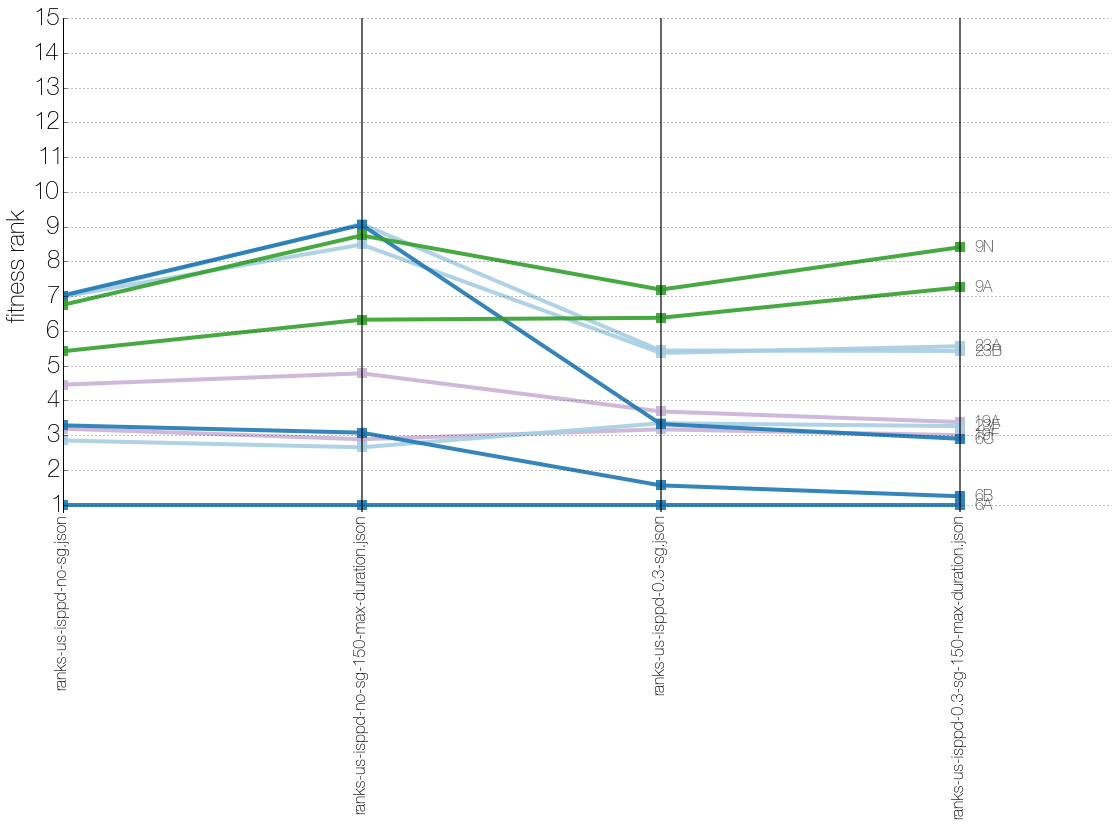

In [28]:
left_only = dict(top=False, bottom=False, left=True, right=False)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sgs_to_plot = ["6", "19", "23", "9"]

df_to_plot = RANKS_DF.ix[:, -5:]
labels = LABELS[-5:]
for st, ranks in df_to_plot.iterrows():
  sg = get_serogroup(st)
  if sg in sgs_to_plot:  
    ax.plot(ranks, color=SG2COLOR[sg], lw=4, alpha=0.9, marker='s', markersize=10)
    if st == '14' or True:
      ax.text(len(labels) - 0.95, ranks[-1], st, transform=ax.transData, clip_on=True, va='center', size=16, alpha=0.7)

#for sg in sgs_to_plot:
#  ax.plot([], [], color=SG2COLOR[sg], lw=4, alpha=0.9, marker='s', markersize=8, label=sg)
  
ax.set_ylim(0.8, 15)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.set_xticks(np.arange(len(labels) + 1))
ax.set_xlim(0, len(labels) - 0.5)
ax.set_xticklabels(labels, rotation=90)
#ax.set_xticklabels([])

ax.yaxis.grid()
ax.xaxis.grid(ls='-', color='k', alpha=0.8, lw=1.5)

ax.set_ylabel('fitness rank', size=24)
lgd = ax.legend(loc='upper right', frameon=True, fontsize=20)
ax.tick_params(axis='y', labelsize=24)
remove_spines(ax, **left_only)
fig.tight_layout()
save_fig(fig, "ranks-parallel-coords-comparing-max-duration", exts=['pdf', 'png'], bbox_inches='tight', additional_artists=lgd)

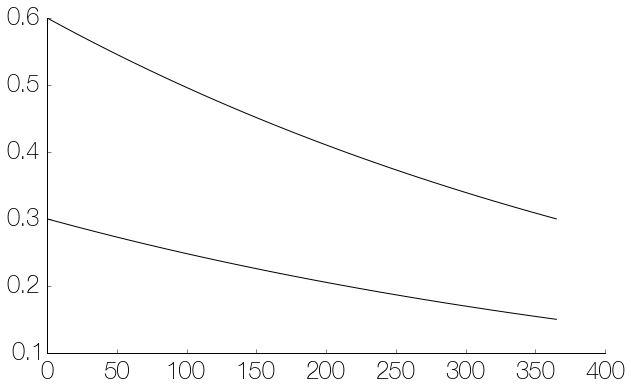

In [421]:
def get_decay(initial, halflife):
  return np.vectorize(lambda x: initial * np.exp(-np.log(2) * x / halflife))

x = np.linspace(0, 365)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, get_decay(0.6, 365)(x))
ax.plot(x, get_decay(0.3, 365)(x))
remove_spines(ax)